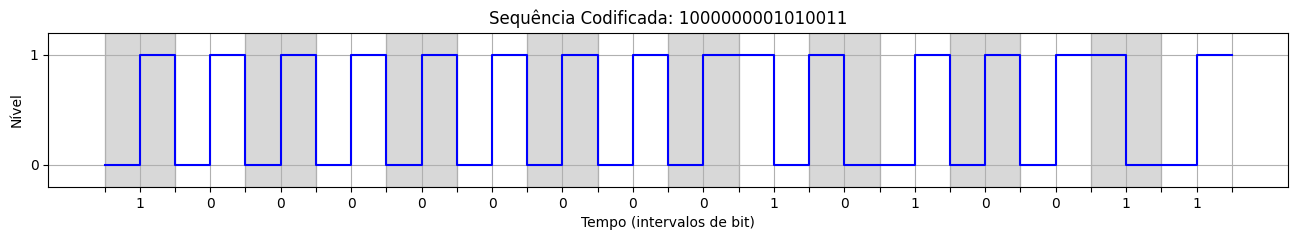

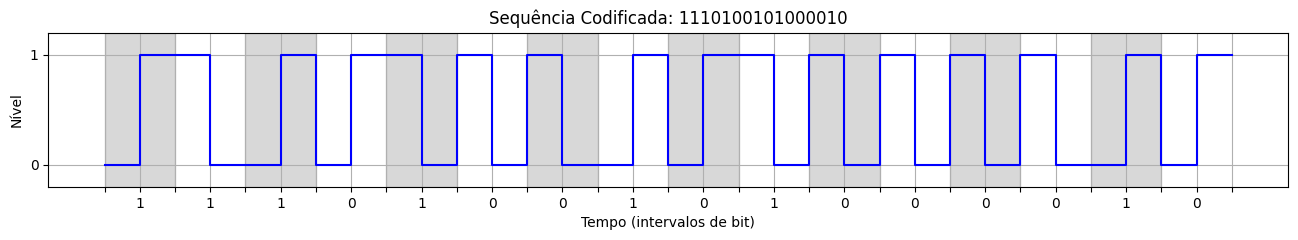

In [5]:
import matplotlib.pyplot as plt
import numpy as np

def manchester_differential(bit_string):
    """ 
    Codifica uma string de bits usando a codificação Manchester Diferencial (Differential Manchester).

    Esta função assume que o nível inicial do sinal é '0'.
    Args:
        bit_string (str): A string de bits a ser codificada, composta por '0's e '1's.

    Returns:
        list: Uma lista de inteiros representando o sinal codificado, onde cada valor da lista é o nível do sinal em cada ponto do tempo.
    """
    # Inicializando o primeiro nível (começamos com 1)
    encoded_signal = []
    current_level = 0  # Começamos com o nível '0'

    # Codificação Manchester Diferencial
    for i, bit in enumerate(bit_string):
        if bit == '1':
            # Para o bit 1, o sinal não muda no início do intervalo
            encoded_signal.append(current_level)
            current_level = 1 - current_level  # Transição no meio do bit
            encoded_signal.append(current_level)
        elif bit == '0':
            # Para o bit 0, o sinal muda no início do intervalo
            current_level = 1 - current_level  # Transição no início do bit
            encoded_signal.append(current_level)
            current_level = 1 - current_level  # Transição no meio do bit
            encoded_signal.append(current_level)

    return encoded_signal

def plot_signal(bit_string, encoded_signal, title):
    bit_intervals = np.arange(0, len(encoded_signal), 1)
    
    plt.figure(figsize=(16, 2))
    
    # Plot da sequência codificada
    plt.step(bit_intervals, encoded_signal, where='post', label='Codificado', color='b')
    plt.ylim([-0.2, 1.2])
    
    # Preenchimentos verticais para indicar o intervalo de cada bit original
    for i in range(0, len(encoded_signal)-1, 4):
        # if (i != 0):
        plt.fill_between([i, i+2], -0.2, 1.2, color='gray', alpha=0.3)
    
    plt.title(title)
    plt.xlabel('Tempo (intervalos de bit)')
    plt.ylabel('Nível')
    plt.grid(True)
    plt.xticks(np.arange(0, len(encoded_signal), 1), labels=[tick for bit in bit_string for tick in ("", bit)]+[""])
    plt.yticks([0, 1])
    plt.show()

# Strings de entrada
bit_strings = ["1000000001010011", "1110100101000010"]

for bit_string in bit_strings:
    # Codificação Manchester Diferencial
    encoded_signal = manchester_differential(bit_string)
    encoded_signal_to_plot = encoded_signal + [encoded_signal[-1]] # Para não cortar o sinal do último bit 
    # Plotando as sequências originais e codificadas
    plot_signal(bit_string, encoded_signal_to_plot, f'Sequência Codificada: {bit_string}')
